In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\55839\AppData\Local\Temp\ipykernel_34460\1020607637.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
caminho = r"D:\##ANALISEDEDADOS\##PREDITIVA\2. COMO RESUMIR E INTERPRETAR DADOS\bank_marketing.xlsx"
df = pd.read_excel(caminho)
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
1,NaN,Não,33,Operário,Casado,Ensino Médio,Não,263,Sim,Não,3
2,NaN,Não,58,Aposentado,Casado,Ensino Médio,Não,19,Não,Sim,3
3,NaN,Sim,83,Aposentado,Casado,Fundamental,Não,425,Não,Não,1
4,NaN,Sim,32,Administrador,Solteiro,Ensino Superior,Não,10281,Não,Não,1


In [3]:
#Removendo coluna com 100% NaN - "Unnamed: 0"

In [4]:
df.drop(columns="Unnamed: 0", inplace=True)

In [5]:
#Transformando primeira linha em cabeçalho de colunas

In [6]:
aux = 0
for coluna in df:
    df.rename(columns = {coluna : df.iloc[0, aux]}, inplace=True)
    aux += 1

In [7]:
df.head(3)

,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
0,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
1,Não,33,Operário,Casado,Ensino Médio,Não,263,Sim,Não,3
2,Não,58,Aposentado,Casado,Ensino Médio,Não,19,Não,Sim,3


In [8]:
#Removendo primeira linha

In [9]:
df.drop(index=0, inplace=True)

In [10]:
df.head()

,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
1,Não,33,Operário,Casado,Ensino Médio,Não,263,Sim,Não,3
2,Não,58,Aposentado,Casado,Ensino Médio,Não,19,Não,Sim,3
3,Sim,83,Aposentado,Casado,Fundamental,Não,425,Não,Não,1
4,Sim,32,Administrador,Solteiro,Ensino Superior,Não,10281,Não,Não,1
5,Sim,31,Administrador,Solteiro,Ensino Médio,Não,360,Sim,Não,1


In [11]:
#Identificando tipo de dados

In [12]:
df.dtypes

Cliente_Comprou_o_Titulo?    object
Idade                        object
Profissão                    object
Estado_Civil                 object
Formação                     object
Cliente_Devedor?             object
Saldo_Conta_Corrente         object
Tem_Hipoteca?                object
Tem_Emprestimo?              object
Qte_de_Ligações_Feitas       object
dtype: object

In [13]:
#Alterando tipo de dados das colunas:Idade; Saldo_Conta_Corrente; Qte_de_Ligações_Feitas

In [14]:
df["Idade"] = df["Idade"].astype(int)
df["Saldo_Conta_Corrente"] = df["Saldo_Conta_Corrente"].astype(float)
df["Qte_de_Ligações_Feitas"] = df["Qte_de_Ligações_Feitas"].astype(int)

In [15]:
#Checando dados após alterações

In [16]:
df.dtypes

Cliente_Comprou_o_Titulo?     object
Idade                          int32
Profissão                     object
Estado_Civil                  object
Formação                      object
Cliente_Devedor?              object
Saldo_Conta_Corrente         float64
Tem_Hipoteca?                 object
Tem_Emprestimo?               object
Qte_de_Ligações_Feitas         int32
dtype: object

In [17]:
#Checando valores nulos

In [18]:
df.isna().sum()

Cliente_Comprou_o_Titulo?    0
Idade                        0
Profissão                    0
Estado_Civil                 0
Formação                     0
Cliente_Devedor?             0
Saldo_Conta_Corrente         0
Tem_Hipoteca?                0
Tem_Emprestimo?              0
Qte_de_Ligações_Feitas       0
dtype: int64

In [19]:
#Checando valores duplicados

In [20]:
df.duplicated().sum()

278

In [21]:
#Checando se realmente são valores duplicados
#RESPOSTA: existe dados repetidos mas nao linhas duplicadas
df[df.duplicated()==1].head()

,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
945,Sim,32,Estudante,Solteiro,Ensino Superior,Não,1138.0,Não,Não,3
1063,Sim,57,Aposentado,Casado,Ensino Médio,Não,1044.0,Não,Não,1
1066,Sim,32,Autônomo,Casado,Ensino Médio,Não,409.0,Não,Não,2
1102,Sim,37,Administrador,Casado,Ensino Superior,Não,2987.0,Sim,Não,1
1136,Sim,54,Técnico,Casado,Ensino Médio,Não,3994.0,Não,Sim,2


In [22]:
#Analise exploratoria

In [23]:
#Cliente_Comprou_o_Titulo

In [24]:
#Criando df df_cliente_comprou_titulo + calculo de freq_absoluta

In [25]:
df_cliente_comprou_titulo = df["Cliente_Comprou_o_Titulo?"].value_counts().to_frame("freq_absoluta")

In [26]:
#Calculando freq_relativa

In [27]:
df_cliente_comprou_titulo["freq_relativa"] = df["Cliente_Comprou_o_Titulo?"].value_counts(1).to_frame()

In [28]:
#DataViz dos dados referentes à variável: "Cliente comprou título?"

In [29]:
nao_comprou_titulo = df[df["Cliente_Comprou_o_Titulo?"] == "Não"].count()[0]
comprou_titulo = df[df["Cliente_Comprou_o_Titulo?"] == "Sim"].count()[0]

C:\Users\55839\AppData\Local\Temp\ipykernel_34460\153563166.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nao_comprou_titulo = df[df["Cliente_Comprou_o_Titulo?"] == "Não"].count()[0]
C:\Users\55839\AppData\Local\Temp\ipykernel_34460\153563166.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  comprou_titulo = df[df["Cliente_Comprou_o_Titulo?"] == "Sim"].count()[0]


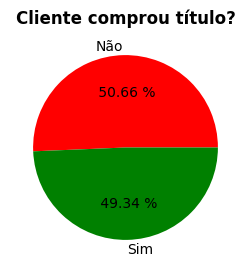

In [30]:
plt.figure(figsize=(5,3))

plt.pie(
    [nao_comprou_titulo, comprou_titulo],
    labels=["Não", "Sim"],
    colors=["red", "green"],
    autopct= "% .2f %%"
)

plt.title("Cliente comprou título?", fontdict={"fontweight":"bold"})

plt.show()

In [31]:
df_cliente_comprou_titulo

,freq_absoluta,freq_relativa
Cliente_Comprou_o_Titulo?,,
Não,4906,0.506609
Sim,4778,0.493391


In [202]:
#INSIGHTS:
#Ligeira maioria da base não comprou o título (50,66%)
#Qual a meta?
#Qual benchmark?

In [33]:
#Idade

In [34]:
#Mapeando dados para criar classes de acordo com regra de Sturges

In [35]:
#Identificando maior valor de idade (95)
df["Idade"].max()
#Identificando menor valor de idade (18)
df["Idade"].min()
#Identificando total de dados na coluna (9684)
df["Idade"].shape

(9684,)

In [36]:
#Considerando:
#Amplitude da classe≈7
#[18, 25)
#[25, 32)
#[32, 39)
#[39, 46)
#[46, 53)
#[53, 60)
#[60, 67)
#[67, 74)
#[74, 81)
#[81, 88)
#[88, 95]

#Criando delimitadores de intervalos entre classes e rotulos para cada classe
divisores = [17, 25, 32, 39, 46, 53, 60, 67, 74, 81, 88, 95]
rotulos= ["18-25", "25-32", "32-39", "39-46", "46-53", "53-60", "60-67", "67-74", "74-81", "81-88", "88-95"]

In [37]:
#Criando coluna faixa_etaria em df

In [38]:
df["faixa_etaria"] = pd.cut(
    df["Idade"],
    bins=divisores,
    labels=rotulos,
    right=False
)

In [39]:
#Criando dataframe exclusivo para variavel faixa_etaria e calculando freq_absoluta

In [40]:
df_fx_etaria = df["faixa_etaria"].value_counts().to_frame("freq_absoluta")

In [41]:
#Ordenando variavel qualitativa ordinal (faixa_etaria)

In [42]:
df_fx_etaria = df_fx_etaria.reindex(
    index=rotulos
)

In [43]:
#Calculando freq_relativa

In [44]:
df_fx_etaria["freq_relativa"] = df["faixa_etaria"].value_counts(1).to_frame()

In [45]:
#Calculando freq_acumulada

In [46]:
df_fx_etaria["freq_acumulada"] = df_fx_etaria["freq_relativa"].cumsum()

In [47]:
#DataViz dos dados referentes à variável: "faixa_etaria"

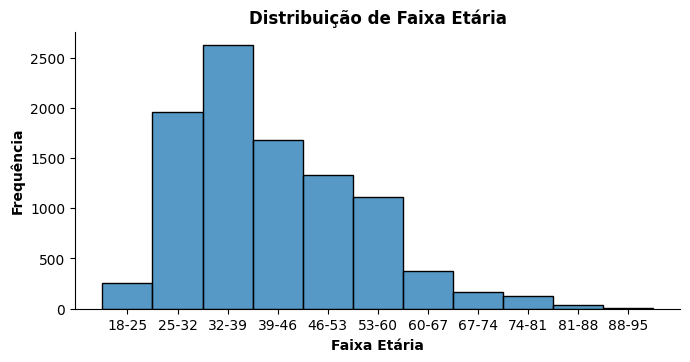

In [167]:
sns.displot(
    df["faixa_etaria"],
    height=3.5, 
    aspect=2
)

plt.title("Distribuição de Faixa Etária", fontdict={"fontweight":"bold"})
plt.xlabel("Faixa Etária", fontdict={"fontweight":"bold"})
plt.ylabel("Frequência", fontdict={"fontweight":"bold"})

plt.show()

In [49]:
df_fx_etaria

,freq_absoluta,freq_relativa,freq_acumulada
faixa_etaria,,,
18-25,261,0.026954,0.026954
25-32,1961,0.202520,0.229474
32-39,2622,0.270784,0.500258
39-46,1677,0.173190,0.673448
46-53,1329,0.137251,0.810699
53-60,1116,0.115254,0.925953
60-67,374,0.038624,0.964577
67-74,168,0.017350,0.981927
74-81,128,0.013219,0.995146


In [201]:
#INSIGHTS
#32-39 corresponde à maior categoria de idade da base (27,07%)
    #Interessante devido à maior probabilidade de possuir renda suficiente ppara investir em ativos?
#25-53 corresponde a cerca de 78,35% da base
#Qual a meta?
#Quais os benchmarks?

In [51]:
#Profissão

In [52]:
#Calculando freq_absoluta

In [53]:
df_profissao = df["Profissão"].value_counts().to_frame("freq_absoluta")

In [54]:
#Calculando freq_relativa

In [55]:
df_profissao["freq_relativa"] = df["Profissão"].value_counts(1).sort_values(ascending=False).to_frame()

In [56]:
#Calculando freq_acumulada

In [57]:
df_profissao["freq_acumulada"] = df["Profissão"].value_counts(1).sort_values(ascending=False).cumsum().to_frame()

In [58]:
#DataViz dos dados referentes à variável: "Profissao"

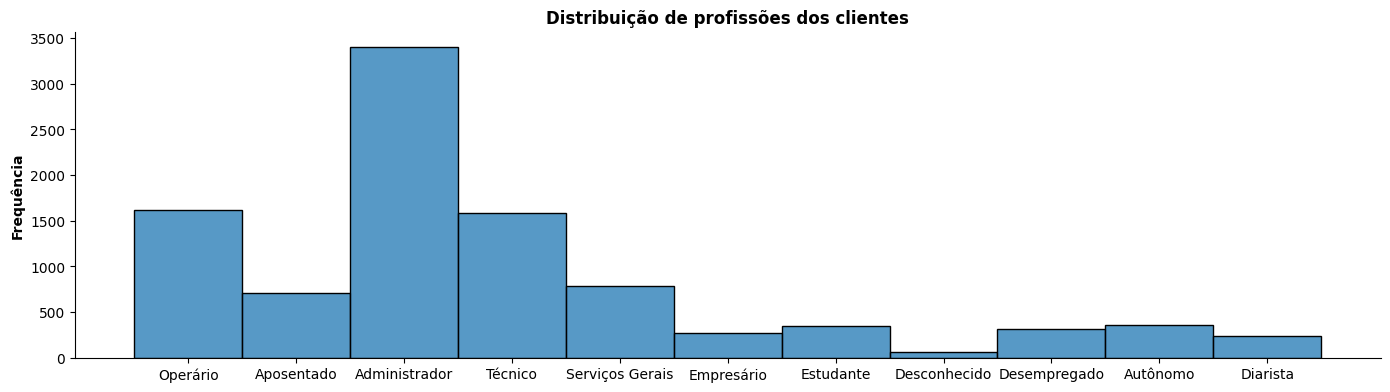

In [173]:
sns.displot(
    df["Profissão"],
    height=4,
    aspect=3.5
)

plt.title("Distribuição de profissões dos clientes", fontdict={"fontweight":"bold"})
plt.xlabel("")
plt.ylabel("Frequência", fontdict={"fontweight":"bold"});

In [190]:
df_profissao.head(10)

,freq_absoluta,freq_relativa,freq_acumulada
Profissão,,,
Administrador,3402,0.351301,0.351301
Operário,1621,0.167390,0.518691
Técnico,1582,0.163362,0.682053
Serviços Gerais,781,0.080648,0.762701
Aposentado,706,0.072904,0.835605
Autônomo,355,0.036658,0.872264
Estudante,344,0.035523,0.907786
Desempregado,317,0.032734,0.940520
Empresário,273,0.028191,0.968711


In [203]:
#INSIGHTS
#Administrador corresponde à maior categoria da base (35,13%)
    #Dado interessante devido ao nivel de consciencia elevado deste tipo de profissão?
#Administrador, Operário, Tecnico e Serviços Gerais correspondem a 76,27% da base
#Qual a meta?
#Quais os benchmarks?

In [62]:
#Formação

In [63]:
#Calculando freq_absoluta e ordenando variavel qualitativa ordinal. Em seguida, transformando em dataframe

In [64]:
df_formacao = df["Formação"].value_counts().reindex(index=["Fundamental", "Ensino Médio", "Ensino Superior", "Desconhecido"]).to_frame("freq_absoluta")

In [65]:
#Calculando freq_relativa

In [66]:
df_formacao["freq_relativa"] = df["Formação"].value_counts(1).reindex(index=["Fundamental", "Ensino Médio", "Ensino Superior", "Desconhecido"]).to_frame()

In [67]:
#Calculando freq_acumulada

In [68]:
df_formacao["freq_acumulada"] = df["Formação"].value_counts(1).reindex(index=["Fundamental", "Ensino Médio", "Ensino Superior", "Desconhecido"]).cumsum().to_frame()

In [69]:
#DataViz dos dados referentes à variável: "formação"

In [70]:
#Modificando tipo de dado da variável para "categoria"

In [71]:
df["Formação"] = df["Formação"].astype("category")

In [72]:
#Reordenando categoria para dispor a variavel adequadamente no grafico por se tratar de variavel qualitativa ordinal

In [73]:
ordem_categoria = ["Fundamental", "Ensino Médio", "Ensino Superior", "Desconhecido"]
df["Formação"] = df["Formação"].cat.reorder_categories(ordem_categoria, ordered=True)

In [74]:
#Grafico

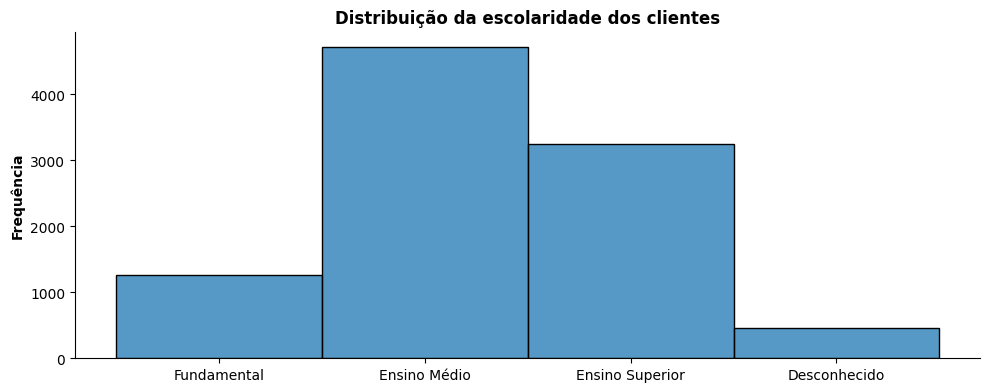

In [171]:
sns.displot(
    df["Formação"],
    height=4,
    aspect=2.5
)

plt.title("Distribuição da escolaridade dos clientes", fontdict={"fontweight":"bold"})
plt.xlabel("")
plt.ylabel("Frequência", fontdict={"fontweight":"bold"});

In [76]:
df_formacao

,freq_absoluta,freq_relativa,freq_acumulada
Formação,,,
Fundamental,1267,0.130834,0.130834
Ensino Médio,4718,0.487195,0.618030
Ensino Superior,3247,0.335295,0.953325
Desconhecido,452,0.046675,1.000000


In [199]:
#INSIGHTS
#Ensino médio é a categoria mais prevalente na base (48,71%)
#Ensino médio + ensino superior correspondem a 82,23% da base.
#O que houve para, quase, 5% da base não informar os dados de escolaridade?
#Qual a meta?
#Quais os benchmarks?

In [78]:
#Estado Civil

In [79]:
#Criando tabela da variavel qualitativa ordinal "Estado Civil" + Calculo da freq_absoluta

In [80]:
df_estado_civil = df["Estado_Civil"].value_counts().to_frame("freq_absoluta")

In [81]:
#Reordenando variavel qualitativa ordinal

In [82]:
df_estado_civil = df_estado_civil.reindex(
    index=["Solteiro", "Casado", "Divorciado"]
)

In [83]:
#Calculando freq_relativa

In [84]:
df_estado_civil["freq_relativa"] = df["Estado_Civil"].value_counts(1).to_frame()

In [85]:
#Calculando freq_acumulada

In [86]:
df_estado_civil["freq_acumulada"] = df["Estado_Civil"].value_counts(1).reindex(index=["Solteiro", "Casado", "Divorciado"]).cumsum().to_frame()

In [87]:
#DataViz dos dados referentes à variável: "Estado_Civil"

In [88]:
#Definindo "categoria" como tipo da variável "Estado_Civil"

In [89]:
df["Estado_Civil"] = df["Estado_Civil"].astype("category")

In [90]:
#Reordenando a categoria para dispor a variável adequadamente por se tratar de variavel qualitativa ordinal

In [91]:
categorias_ordenadas = ['Solteiro', 'Casado', 'Divorciado']
df['Estado_Civil'] = df['Estado_Civil'].cat.reorder_categories(categorias_ordenadas, ordered=True)

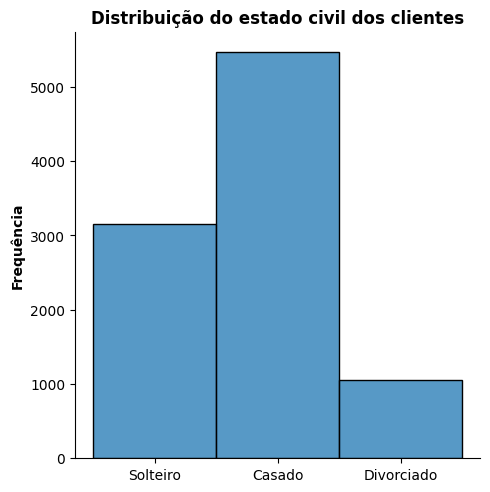

In [92]:
sns.displot(
    df["Estado_Civil"]
)

plt.title("Distribuição do estado civil dos clientes", fontdict={"fontweight":"bold"})
plt.xlabel("")
plt.ylabel("Frequência", fontdict={"fontweight":"bold"});

In [93]:
df_estado_civil

,freq_absoluta,freq_relativa,freq_acumulada
Estado_Civil,,,
Solteiro,3159,0.326208,0.326208
Casado,5469,0.564746,0.890954
Divorciado,1056,0.109046,1.000000


In [198]:
#INSIGHTS:
#89.09% da base é solteiro ou casado
#A base é formada, majoritariamente, por casados (56,47%). Ser casado é melhor pois a familia tem duas fontes de renda 
#e, consequentemente, maior possibilidade de investir?
#Qual a meta?
#Qual o benchmark?

In [95]:
#Cliente_Devedor?

In [96]:
#Criando tabela de Cliente_Devedor?	+ Calculo de freq_abolsuta

In [97]:
df_cliente_devedor = df["Cliente_Devedor?"].value_counts().to_frame("freq_absoluta")

In [98]:
#Calculando freq_relativa

In [99]:
df_cliente_devedor["freq_relativa"] = df["Cliente_Devedor?"].value_counts(1).to_frame()

In [100]:
#Calculando freq_acumulada

In [101]:
df_cliente_devedor["freq_acumulada"] = df["Cliente_Devedor?"].value_counts(1).cumsum().to_frame()

In [102]:
#DataViz dos dados referentes à variável: "Cliente devedor?"

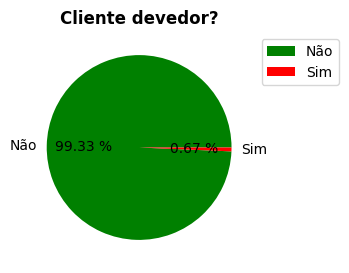

In [103]:
nao = df_cliente_devedor.loc["Não", "freq_absoluta"]
sim = df_cliente_devedor.loc["Sim", "freq_absoluta"]

plt.figure(figsize=(5,3))

plt.pie(
    [nao, sim],
    labels=["Não", "Sim"],
    colors=["green", "red"],
    autopct="%.2f %%"
)


plt.title("Cliente devedor?", fontdict={"fontweight":"bold"})
plt.legend(bbox_to_anchor=(1,1))

plt.show()

In [104]:
df_cliente_devedor

,freq_absoluta,freq_relativa,freq_acumulada
Cliente_Devedor?,,,
Não,9619,0.993288,0.993288
Sim,65,0.006712,1.000000


In [197]:
#INSIGHTS
#Quase 100% da base NÃO é cliente devedor. Qual criterio de escolha destes clientes? Foi intencional?
#É interessante que maior parte da base não seja devedora?
#Qual a meta?
#Qual benchmark?

In [106]:
#Feature Engineering da coluna Saldo_Conta_Corrente - criando faixas de valores
#Para isso: Identificar maior valor, menor valor e quantidade de dados. Em seguida, aplicar Sturges para calcular numero de classes, 
#intervalos de classes e rotulos

In [107]:
#maior_valor (29340)
df["Saldo_Conta_Corrente"].max()
#menor_valor (1)
df["Saldo_Conta_Corrente"].min()
#qtd_dados (9684)
df["Saldo_Conta_Corrente"].shape

#Segundo Sturges:
#Qtd Classes ~5
#Intervalos
#"1-5868"
#"5868-11735"
#"11735-17602"
#"17602-23469"
#"23469-29340"

#Recalculando qtd de classes e novos intervalos para maior granularidade
#Qtd Classes ~15
#Intervalos
#"1-1956"
#"1956-3911"
#"3911-5866"
#"5866-7821"
#"7821-9776"
#"9776-11731"
#"11731-13686"
#"13686-15641"
#"15641-17596"
#"17596-19551"
#"19551-21506"
#"21506-23461"
#"23461-25416"
#"25416-27371"
#"27371-29340"

(9684,)

In [108]:
#Definindo delimitadores de intervalos de classe e rotulos de cada classe

In [109]:
delimitador1 = [0, 1956, 3911, 5866, 7821, 9776, 11731, 13686, 15641, 17596, 19551, 21506, 23461, 25416, 27371, 29341]
rotulos1 = ["1-1956",
"1956-3911",
"3911-5866",
"5866-7821",
"7821-9776",
"9776-11731",
"11731-13686",
"13686-15641",
"15641-17596",
"17596-19551",
"19551-21506",
"21506-23461",
"23461-25416",
"25416-27371",
"27371-29340"]

In [110]:
#Criando coluna com categorias

In [111]:
df["fx_Saldo_Conta_Corrente"] = pd.cut(
    df["Saldo_Conta_Corrente"],
    bins=delimitador1,
    labels=rotulos1,
    right=False
)

In [112]:
#Criando tabela fx_Saldo_Conta_Corrente + calculo de freq_absoluta

In [113]:
df_fx_Saldo_Conta_Corrente = df["fx_Saldo_Conta_Corrente"].value_counts().to_frame("freq_absoluta")

In [114]:
#Ordenado categorias

In [115]:
df_fx_Saldo_Conta_Corrente = df_fx_Saldo_Conta_Corrente.reindex(
    index=rotulos1
)

In [116]:
#Calculando freq_relativa

In [117]:
df_fx_Saldo_Conta_Corrente["freq_relativa"] = df["fx_Saldo_Conta_Corrente"].value_counts(1).to_frame()

In [118]:
#Calculando freq_acumulada

In [119]:
df_fx_Saldo_Conta_Corrente["freq_acumulada"] = df_fx_Saldo_Conta_Corrente["freq_relativa"].cumsum().to_frame()

In [120]:
#DataViz dos dados referentes à variável: "fx_Saldo_Conta_Corrente"

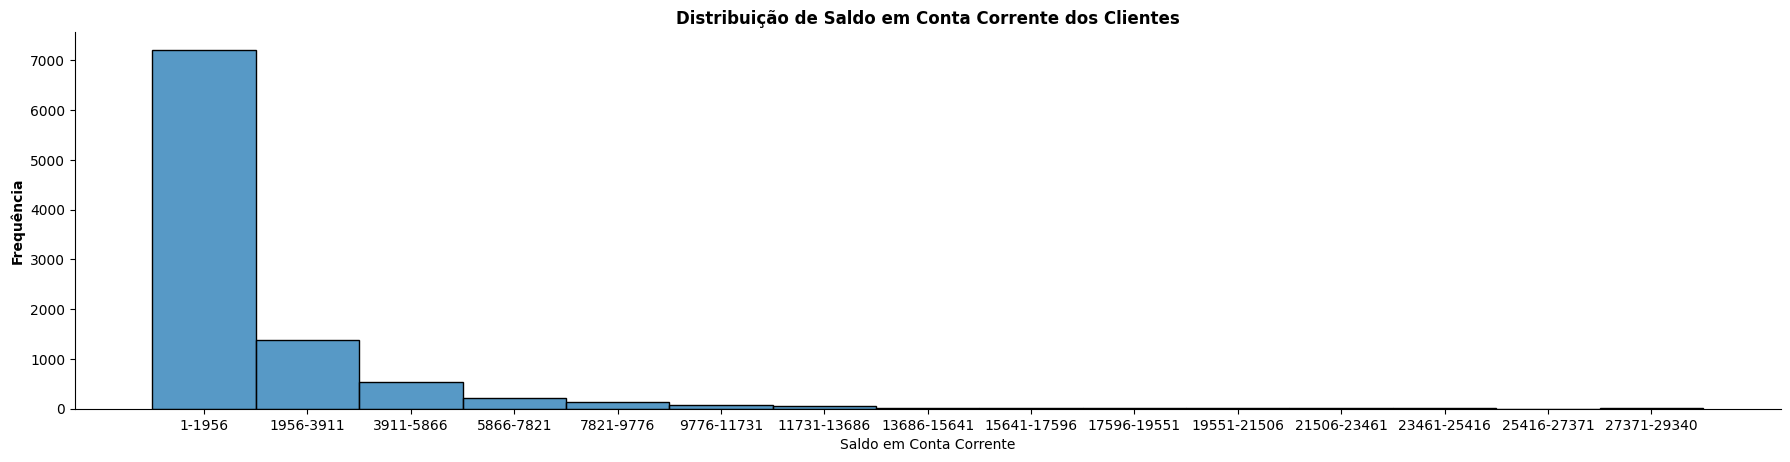

In [121]:
sns.displot(
    df["fx_Saldo_Conta_Corrente"],
    height=4.5,
    aspect=4
)

plt.title("Distribuição de Saldo em Conta Corrente dos Clientes", fontdict={"fontweight":"bold"})
plt.xlabel("Saldo em Conta Corrente")
plt.ylabel("Frequência", fontdict={"fontweight":"bold"});

In [192]:
#INSIGHTS
#Faixa com 1-1956 de saldo_conta_corrente possui maior concentração na base (74,43%)
#Isso é desfavorável? Visto que menor renda implica em menor probabilidade de alocar recurso em investimento?
#Qual a meta?
#Qual o benchmark?

In [123]:
#Tem_Hipoteca?

In [124]:
#Criando tabela Tem_Hipoteca? + calculo freq_absoluta

In [125]:
df_tem_hipoteca = df["Tem_Hipoteca?"].value_counts().to_frame("freq_absoluta")

In [126]:
#Calculando freq_relativa

In [127]:
df_tem_hipoteca["freq_relativa"] = df["Tem_Hipoteca?"].value_counts(1).to_frame()

In [128]:
#Calculando freq_acumulada

In [129]:
df_tem_hipoteca["freq_acumulada"]= df["Tem_Hipoteca?"].value_counts(1).cumsum().to_frame()

In [130]:
#DataViz dos dados referentes à variável: "Tem hipoteca?"

In [131]:
nao_tem_hipoteca = df.loc[df["Tem_Hipoteca?"] == "Não"].count()[0]
tem_hipoteca = df.loc[df["Tem_Hipoteca?"] == "Sim"].count()[0]

C:\Users\55839\AppData\Local\Temp\ipykernel_34460\4291275183.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nao_tem_hipoteca = df.loc[df["Tem_Hipoteca?"] == "Não"].count()[0]
C:\Users\55839\AppData\Local\Temp\ipykernel_34460\4291275183.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tem_hipoteca = df.loc[df["Tem_Hipoteca?"] == "Sim"].count()[0]


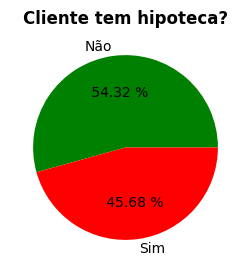

In [132]:
plt.figure(figsize=(5,3))

plt.pie(
    [nao_tem_hipoteca, tem_hipoteca],
    labels=["Não", "Sim"],
    colors=["green", "red"],
    autopct = "% .2f %%"
)

plt.title("Cliente tem hipoteca?", fontdict={"fontweight":"bold"})

plt.show()

In [133]:
df_tem_hipoteca

,freq_absoluta,freq_relativa,freq_acumulada
Tem_Hipoteca?,,,
Não,5260,0.543164,0.543164
Sim,4424,0.456836,1.000000


In [193]:
#INSIGHTS
#Maior parte da base NÃO tem hipoteca (54,32%)
#Isso é bom ou ruim?
#Qual a meta?
#Qual benchmark?

In [135]:
#Tem_Emprestimo?	

In [136]:
#Criando tabela Tem_Emprestimo?	+ calculo de freq_absoluta

In [137]:
df_tem_emprestimo = df["Tem_Emprestimo?"].value_counts().to_frame("freq_absoluta")

In [138]:
#Calculando freq_relativa

In [139]:
df_tem_emprestimo["freq_relativa"] = df["Tem_Emprestimo?"].value_counts(1).to_frame()

In [140]:
#Calculando freq_acumulada

In [141]:
df_tem_emprestimo["freq_acumulada"] = df["Tem_Emprestimo?"].value_counts(1).cumsum().to_frame()

In [142]:
#DataViz dos dados referentes à variável: "Tem empréstimo?"

In [143]:
nao_tem_emprestimo = df.loc[df["Tem_Emprestimo?"] == "Não"].count()[0]
tem_emprestimo = df.loc[df["Tem_Emprestimo?"] == "Sim"].count()[0]

C:\Users\55839\AppData\Local\Temp\ipykernel_34460\909435562.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nao_tem_emprestimo = df.loc[df["Tem_Emprestimo?"] == "Não"].count()[0]
C:\Users\55839\AppData\Local\Temp\ipykernel_34460\909435562.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tem_emprestimo = df.loc[df["Tem_Emprestimo?"] == "Sim"].count()[0]


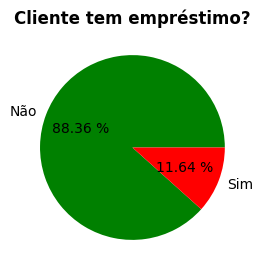

In [144]:
plt.figure(figsize=(5,3))

plt.pie(
    [nao_tem_emprestimo, tem_emprestimo],
    labels=["Não", "Sim"],
    colors=["green", "red"],
    autopct= "%.2f %%"
)

plt.title("Cliente tem empréstimo?", fontdict={"fontweight":"bold"})

plt.show()

In [145]:
df_tem_emprestimo

,freq_absoluta,freq_relativa,freq_acumulada
Tem_Emprestimo?,,,
Não,8557,0.883622,0.883622
Sim,1127,0.116378,1.000000


In [194]:
#INSIGHTS
#A base, majoritariamente, NÃO possui emprestimo (88,36%)
#Isso é bom porque eles tem mais dinheiro para investir?
#Isso é bom para argumentar que eles podem pegar algum emprestimo para financiar algum sonho/projeto e pagar com rendimento do investimento?
#Qual a meta?
#Qual o benchmark?

In [147]:
#Qte_de_Ligações_Feitas

In [148]:
#Feature Engineering de Qte_de_Ligações_Feitas. Para isso, calcular qtd de classes via Sturges bem como os intervalos das mesmas

In [149]:
#maior_valor (63)
df["Qte_de_Ligações_Feitas"].max()
#menor_valor (1)
df["Qte_de_Ligações_Feitas"].min()
#qtd_dados (9684)
df["Qte_de_Ligações_Feitas"].shape

#**IMPORTANTE**. Intervalos, segundo Sturges, ficam com pouca granularidade. 
#Vou criar intervalos com amplitude = 3 para trazer mais insights para análise
delimitador1 = [0, 4, 7, 10, 13, 16, 19, float("inf")]
rotulos1 = ["1-4",
"4-7",
"7-10",
"10-13",
"13-16",
"16-19",
"20+"]

In [150]:
df["fx_qtd_ligacoes_feitas"] = pd.cut(
    df["Qte_de_Ligações_Feitas"],
    bins=delimitador1,
    labels=rotulos1,
    right=False
)

In [151]:
#Criando df_ligacoes_feitas + freq_absoluta

In [152]:
df_ligacoes_feitas = df["fx_qtd_ligacoes_feitas"].value_counts().to_frame("freq_absoluta")

In [153]:
df_ligacoes_feitas = df_ligacoes_feitas.reindex(
    index=rotulos1
)

In [154]:
#Calculando freq_relativa e criando coluna

In [155]:
df_ligacoes_feitas["freq_relativa"] = df["fx_qtd_ligacoes_feitas"].value_counts(1).to_frame()

In [156]:
#Calculando freq_acumulada e criando coluna

In [157]:
df_ligacoes_feitas["freq_acumulada"] = df_ligacoes_feitas["freq_relativa"].cumsum().to_frame()

In [158]:
#DataViz dos dados referentes à variável: "fx_qtd_ligacoes_feitas"

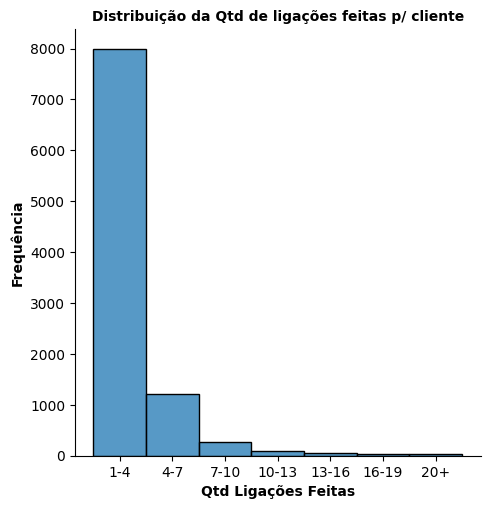

In [159]:
sns.displot(
    df["fx_qtd_ligacoes_feitas"]
)

plt.title("Distribuição da Qtd de ligações feitas p/ cliente",  fontdict={"fontweight":"bold", "fontsize":10})
plt.xlabel("Qtd Ligações Feitas", fontdict={"fontweight":"bold"})
plt.ylabel("Frequência", fontdict={"fontweight":"bold"});

In [160]:
df_ligacoes_feitas

,freq_absoluta,freq_relativa,freq_acumulada
fx_qtd_ligacoes_feitas,,,
1-4,7982,0.824246,0.824246
4-7,1213,0.125258,0.949504
7-10,279,0.028810,0.978315
10-13,99,0.010223,0.988538
13-16,46,0.004750,0.993288
16-19,28,0.002891,0.996179
20+,37,0.003821,1.000000


In [196]:
#INSIGHTS:
#Realizar até 4 ligações foi suficiente para atingir 82,42% da base; investir em mais ligações do que isso só consegue atingir 17,58% da base.
#Qual a meta?
#Qual benchmark?